# Importing all necessary Libraries

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats



# Loading and exploring the dataset

In [11]:
#Loading and exploring the dataset
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Basic dataset information
print("Dataset Shape:", titanic_df.shape)
print("Columns:", titanic_df.columns)
print("Sample Data:\n", titanic_df.head())
print("Data Info:\n")
titanic_df.info()
print("Missing Values:\n", titanic_df.isnull().sum())
print("Descriptive Statistics:\n", titanic_df.describe())


Dataset Shape: (891, 12)
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Sample Data:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0     

# Handling missing data

In [12]:
# Fill missing 'Age' values with the median age
imputer = SimpleImputer(strategy='median')
titanic_df['Age'] = imputer.fit_transform(titanic_df[['Age']])

# Fill missing 'Embarked' values with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to a high rate of missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

print("Missing Values After Handling:\n", titanic_df.isnull().sum())

Missing Values After Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Data transformation

In [13]:
# Converting 'Sex' to numerical (0 for male, 1 for female)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Converting 'Embarked' to one-hot encoded (dummy variables)
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

# Normalization/Scaling

In [14]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare']
titanic_df[numerical_cols] = scaler.fit_transform(titanic_df[numerical_cols])

print("Data After Transformation and Scaling:\n", titanic_df.head())

Data After Transformation and Scaling:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861      1   
2                             Heikkinen, Miss. Laina    1 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1   
4                           Allen, Mr. William Henry    0  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445       False        True  
1      0          PC 17599  0.786845       False       False  
2      0  STON/O2. 3101282 -0.488854       False        True  
3      0            11

# Step 5: Outlier detection and removal

Number of outliers detected: Fare    20
dtype: int64
Final Data Shape: (891, 12)
Final Data:
    PassengerId  Survived  Pclass Name  Sex  Age  SibSp  Parch Ticket  \
0          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   
1          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   
2          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   
3          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   
4          NaN       NaN     NaN  NaN  NaN  NaN    NaN    NaN    NaN   

       Fare Embarked_Q Embarked_S  
0 -0.502445        NaN        NaN  
1  0.786845        NaN        NaN  
2 -0.488854        NaN        NaN  
3  0.420730        NaN        NaN  
4 -0.486337        NaN        NaN  


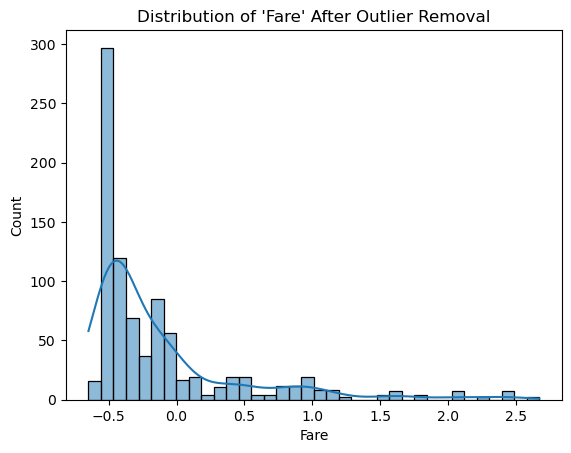

In [17]:
# Detect outliers using the Z-score method
z_scores = np.abs(stats.zscore(titanic_df[['Fare']]))
outliers = (z_scores > 3)  # Setting a threshold of 3 for Z-score
print("Number of outliers detected:", np.sum(outliers))

# Remove outliers
titanic_df = titanic_df[~outliers]

# Final check
print("Final Data Shape:", titanic_df.shape)
print("Final Data:\n", titanic_df.head())

# Visualize the distribution of 'Fare' after outlier removal
sns.histplot(titanic_df['Fare'], kde=True)
plt.title("Distribution of 'Fare' After Outlier Removal")
plt.show()

This code snippet demonstrates various types of charts and visualizations

Histogram: To examine the distribution of a numerical variable.

Scatter Plot: To observe relationships between two numerical variables.

Box Plot: To understand the distribution and outliers for a numerical variable grouped by categories.

Bar Plot: To visualize the relationship between a categorical variable and a numerical or binary variable.

Heatmap: To visualize correlations among numerical variables.

Pie Chart: To represent categorical data as proportions of a whole.

Line Plot: To visualize trends or cumulative counts over time or another continuous variable.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Load the Titanic dataset
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [22]:

# Sample Data
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.drop(columns=['Cabin'], inplace=True, errors='ignore')

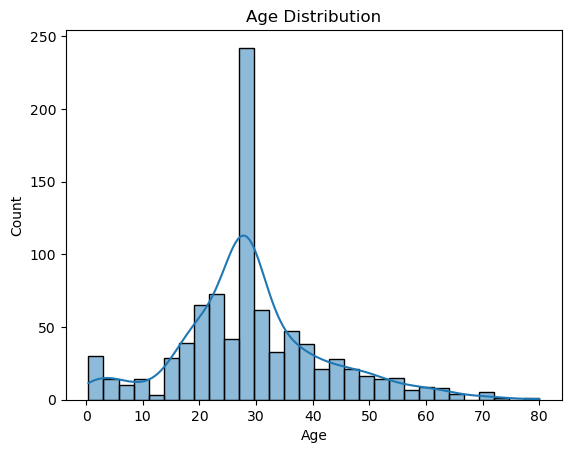

In [23]:
# 1. Histogram
sns.histplot(titanic_df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

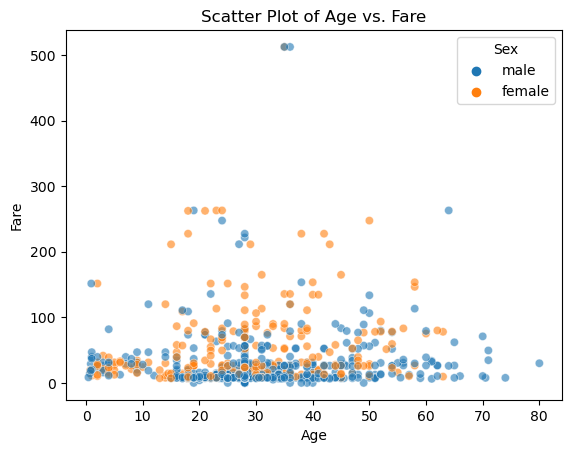

In [24]:
# 2. Scatter Plot
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Sex', alpha=0.6)
plt.title("Scatter Plot of Age vs. Fare")
plt.show()

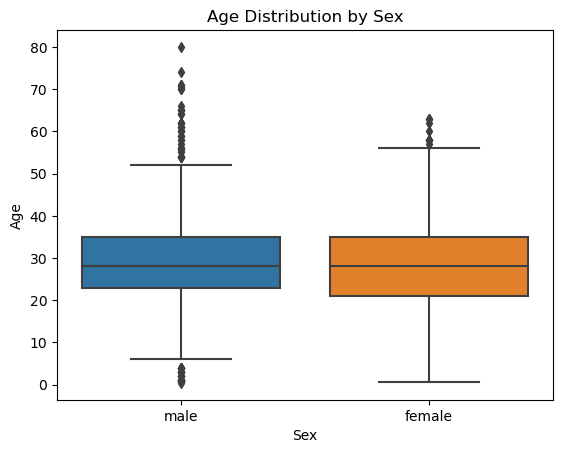

In [25]:
# 3. Box Plot
sns.boxplot(data=titanic_df, x='Sex', y='Age')
plt.title("Age Distribution by Sex")
plt.show()

C:\Users\mojal\AppData\Local\Temp\ipykernel_20788\816741124.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic_df, x='Pclass', y='Survived', ci=None)


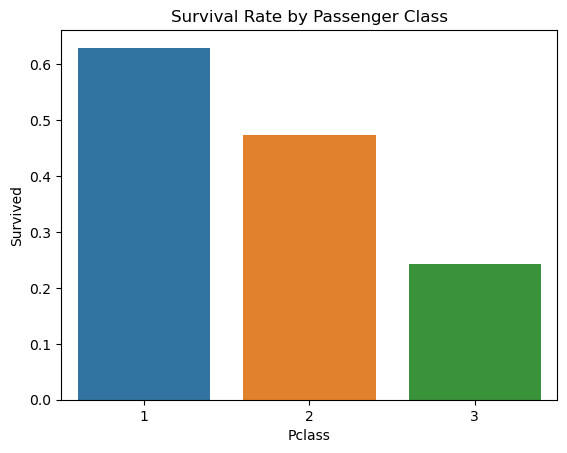

In [26]:
# 4. Bar Plot
sns.barplot(data=titanic_df, x='Pclass', y='Survived', ci=None)
plt.title("Survival Rate by Passenger Class")
plt.show()

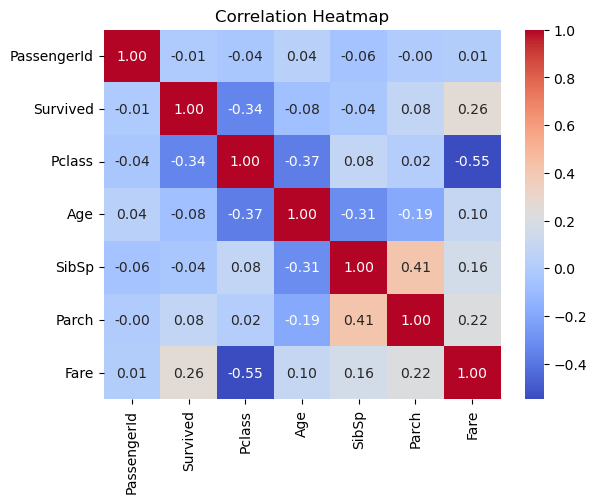

In [33]:
# Drop non-numeric columns
# Alternatively, you could select only the numeric columns
numeric_df = titanic_df.select_dtypes(include=[np.number])

# Correlation Matrix
corr_matrix = numeric_df.corr()  # Correlation matrix for only numeric columns

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # fmt defines the format of the numbers displayed
plt.title("Correlation Heatmap")
plt.show()


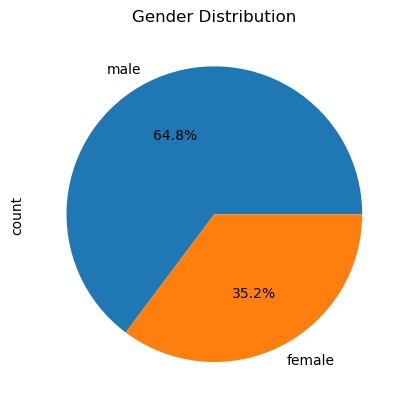

In [34]:
# 6. Pie Chart
titanic_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

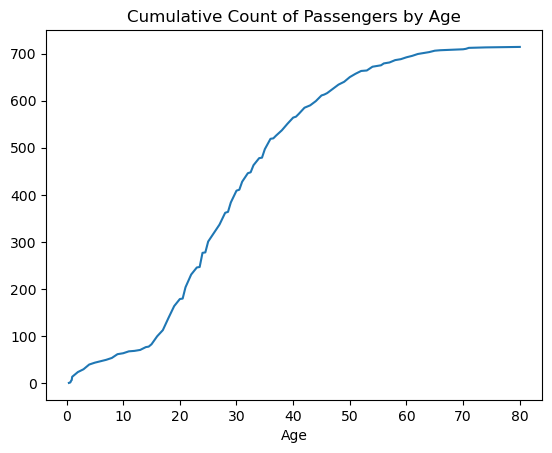

In [35]:
# 7. Line Plot
# Let's create a cumulative count of passengers by age
age_counts = titanic_df['Age'].value_counts().sort_index().cumsum()
age_counts.plot.line()
plt.title("Cumulative Count of Passengers by Age")
plt.show()